<a href="https://colab.research.google.com/github/aitorvv96/testing_new_things/blob/main/Tu_primera_red_neuronal_en_Python_y_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fuente**
https://www.youtube.com/watch?v=iX_on3VxZzk

# **Este script es un ejemplo para hacer una red neuronal simple y convertir ºC a ºF.**

Esto es una función lineal (y = a*x + b)

# **Parte 1: utilizando una única neurona**



In [23]:
import tensorflow as tf
import numpy as np

In [24]:
# datos de prueba
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)  # serían los datos de entrada (A)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)  # y los resultados (B)

Ahora creamos el modelo con KERAS.  
Las capas densas (.Dense) son las que hacen conexiones desde todas las redes hasta todas las redes de la siguiente capa.  
La capa de salida solo tiene una neurona (units=1), y las capas de entrada son solo una neurona (input_shape=[1]).

El modelo .Sequential es un modelo simple.

La siguiente imagen ejemplifica lo que vamos a hacer:

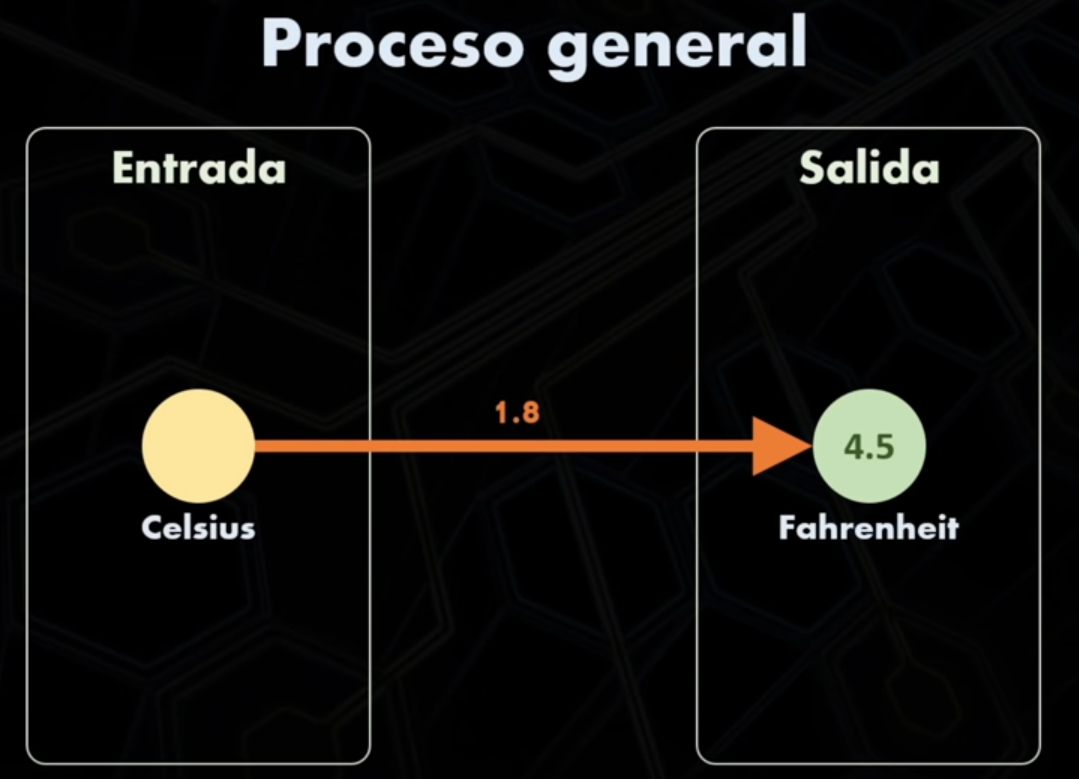

In [29]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

Ahora establecemos los parámetros de compilación.

El optimizador .Adam permite al modelo ajustar pesos y sesgos de manera eficiente para que aprenda y no desaprenda. El nº es la tasa de aprendizaje, lo que varía entre una iteración y la siguiente. Un valor bajo hace que aprenda poco a poco, uno alto más rápido pero con menor precisión.

La función de pérdida (loss) es el error al cuadrado.

In [30]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

Con el modelo listo, el siguiente paso es entrenarlo.

Para ello se usa la función fit, indicando datos de entrada (A) y resultados esperados (B), así como el nº de intentos (epochs) que queremos que realice. El parámetro "verbose" simplemente es para que no nos muestre el texto de cada uno de los intentos que realiza.

In [31]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


Gráfico de función de pérdida.

Este nos indica la magnitud del error en cada una de las iteraciones que realiza el modelo.

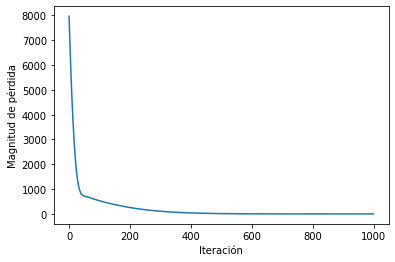

In [32]:
import matplotlib.pyplot as plt
plt.xlabel("Iteración")  # plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

En el gráfico de la función de pérdida podemos ver cómo a partir de la iteración 500 el modelo ya no mejora, por lo que las iteraciones restantes no aportan nada.

Ahora vamos a hacer una prueba (el resultado sería 212ºF).

In [33]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
El resultado es [[211.74025]] fahrenheit!


Vamos a ver ahora las variables internas del modelo.

Ejemplo de resultado:
*[array([[1.7979493]], dtype=float32), array([31.952526], dtype=float32)]*

El primer valor es el peso de la variable A (1.79), mientras que el segundo (31.95) es el error que se suma al cálculo anterior, por lo que el modelo obtenido por el algoritmo es:

B = A*1.79 + 31.95

Mientras que la fórmula real es: 

ºF = ºC*1.8 + 32

In [34]:
print("Variables internas del modelo")
print(capa.get_weights())

Variables internas del modelo
[array([[1.7984223]], dtype=float32), array([31.898008], dtype=float32)]


# **Parte 2: utilizando 3 neuronas**

Ejemplo visual:

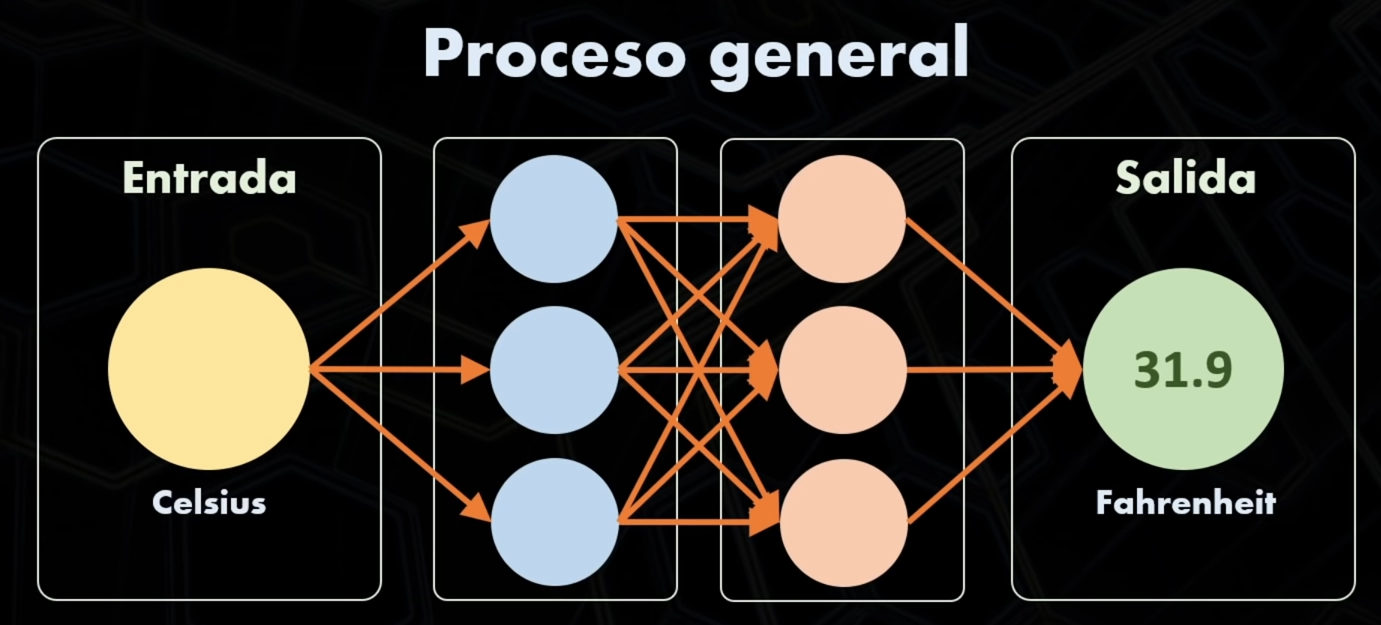

In [43]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [44]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [45]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


Ahora se verá que el aprendizaje es mucho más rápido, ya que desde la iteración ~50 ya no se aprendió nada más.

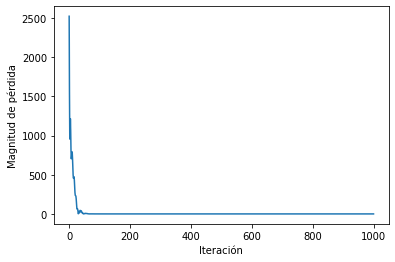

In [46]:
import matplotlib.pyplot as plt
plt.xlabel("Iteración")  # plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

La predicción es similar al caso anterior.

In [47]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
El resultado es [[211.74742]] fahrenheit!


Si comprobamos pesos y sesgos, entonces es donde vemos que lo que ha hecho es totalmente diferente a lo del caso anterior.

Esto demuestra que una red neuronal más compleja puede resolver el mismo problema que otra más simple, aunque el resultado carezca de sentido desde el punto de vista de entender qué ha hecho.

In [48]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.18291046,  0.24473806, -0.58713806]], dtype=float32), array([-2.9404018, -2.382362 , -3.1711962], dtype=float32)]
[array([[-0.9304511 , -1.1889412 , -0.02830924],
       [-1.0537517 ,  0.02037286,  0.321704  ],
       [-0.72905695, -1.3159609 , -0.11941245]], dtype=float32), array([ 3.0971467 ,  3.0809703 , -0.02267124], dtype=float32)]
[array([[ 1.3275068 ],
       [ 1.3770866 ],
       [-0.15724859]], dtype=float32), array([3.0189106], dtype=float32)]
